In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [24]:
df = pd.read_csv("Mall_Customers.csv")


In [25]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
df.shape

(200, 5)

In [27]:
print('\nData types of the columns:')
print(df.dtypes)


Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [28]:
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [29]:
df.describe().astype(int)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


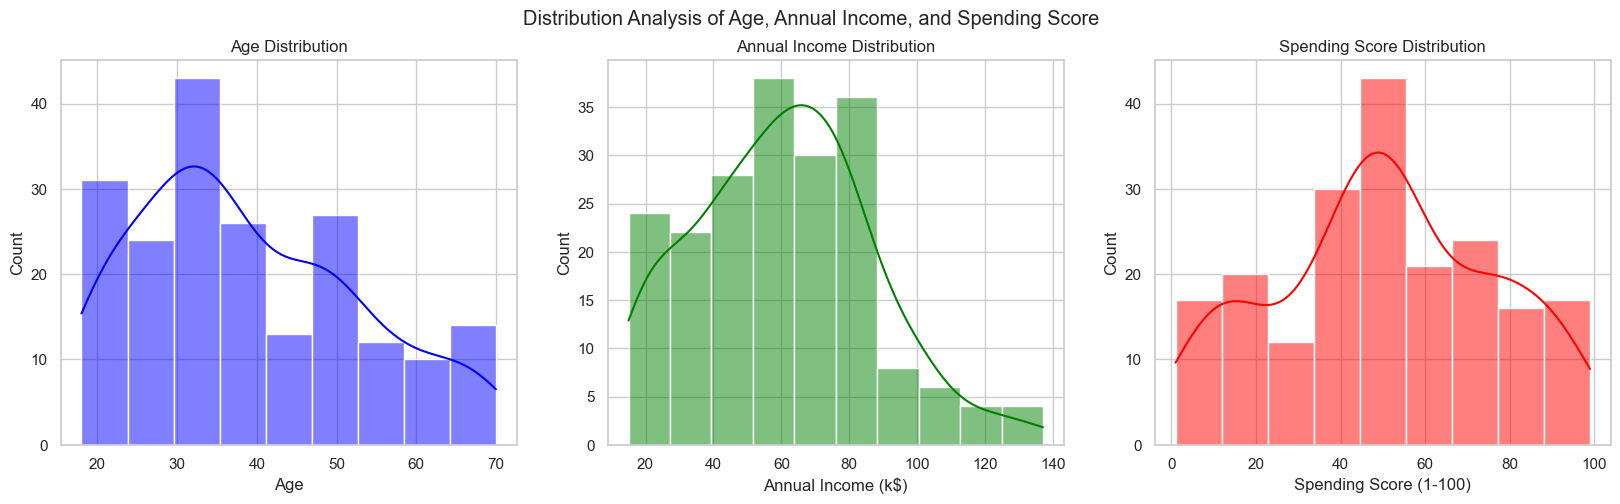

In [30]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

plt.show()

In [31]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

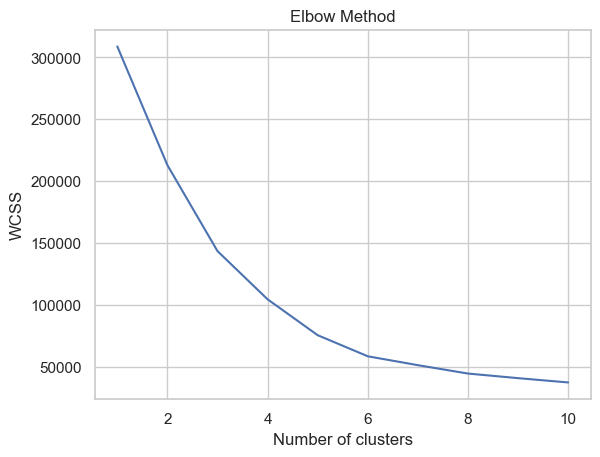

In [32]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

labels = kmeans.fit_predict(features)

df['Cluster'] = labels

df.head(100)



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


In [34]:
cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


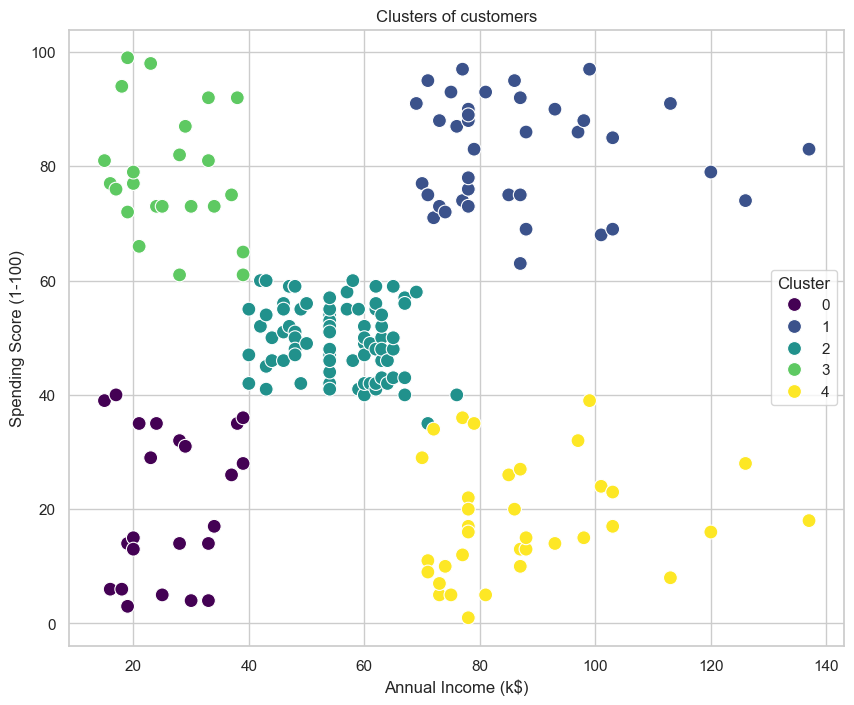

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

plt.title('Clusters of customers')

plt.show()

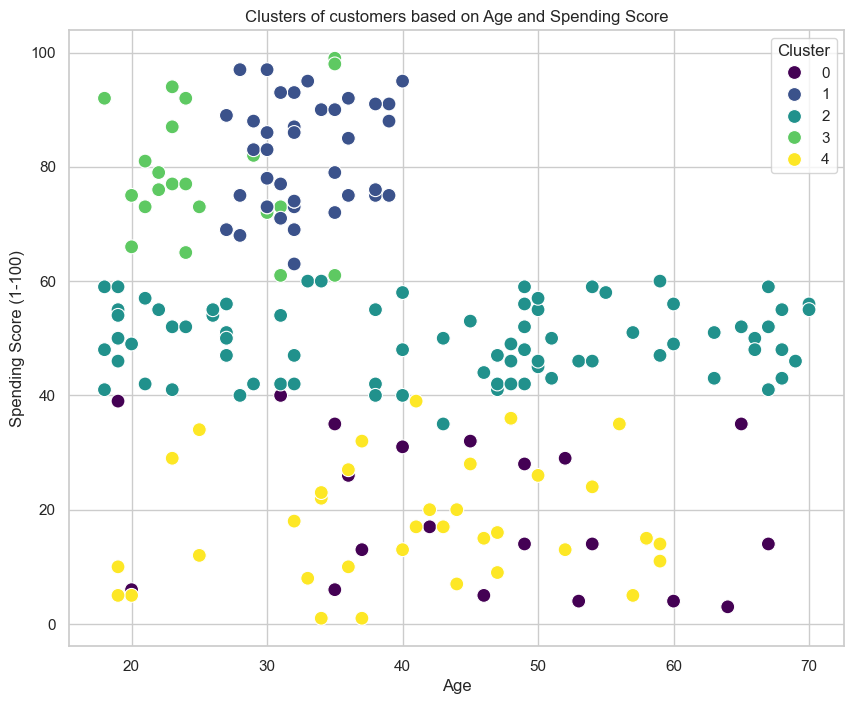

In [36]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

plt.title('Clusters of customers based on Age and Spending Score')

plt.show()

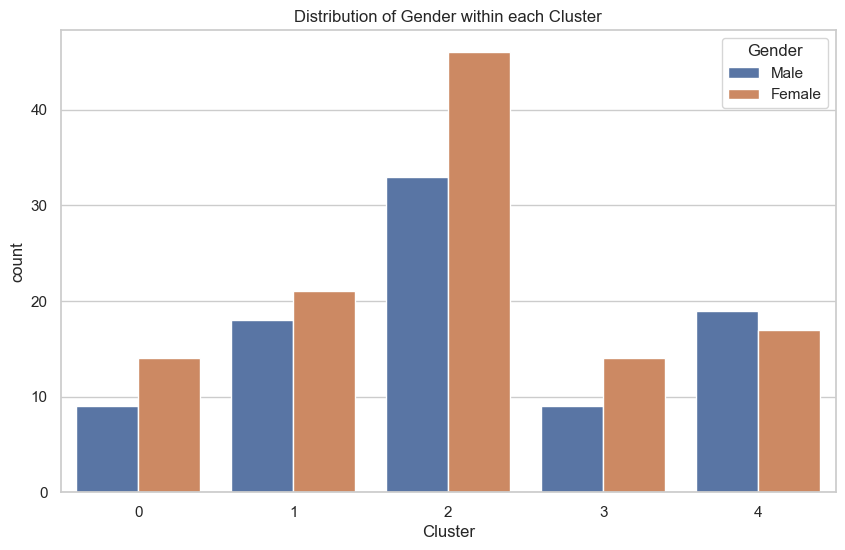

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

plt.title('Distribution of Gender within each Cluster')

plt.show()


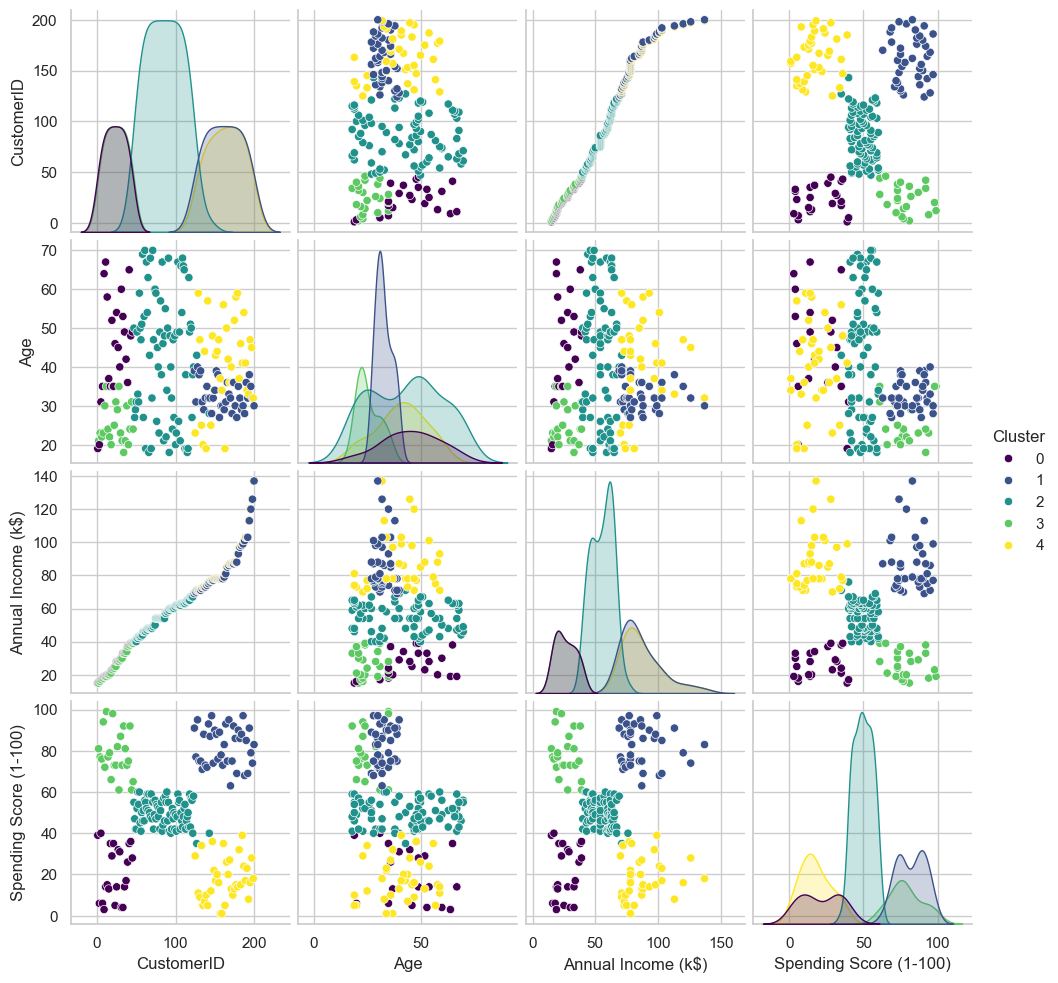

In [38]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


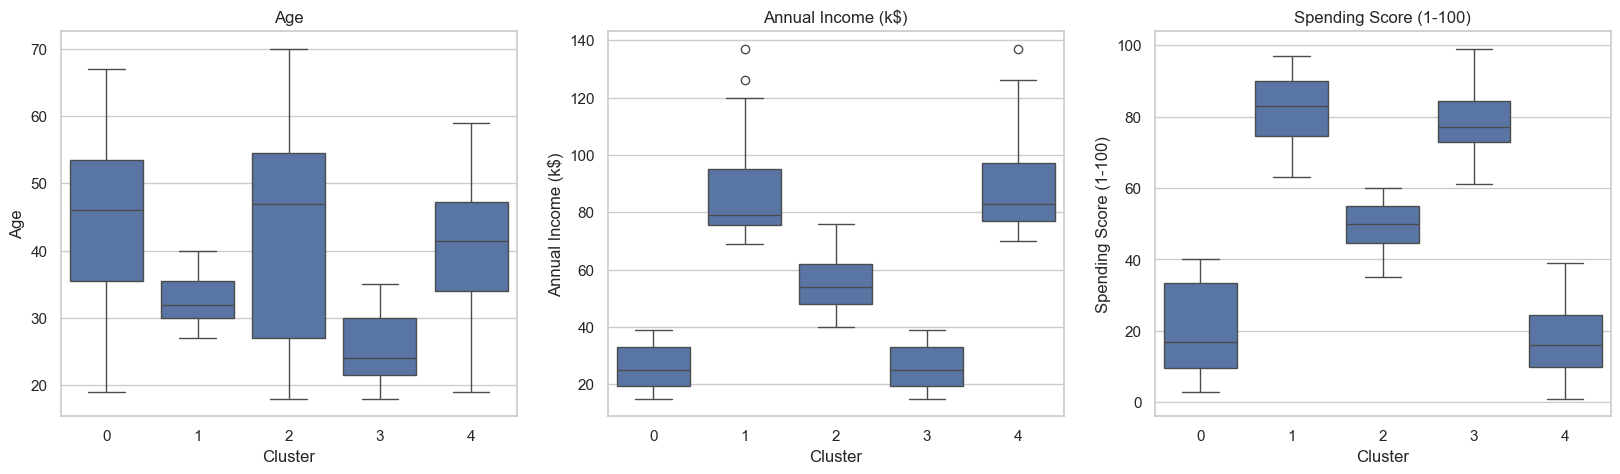

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

plt.show()

In [40]:
from sklearn.metrics import silhouette_score

#The silhouette score is a measure of how well each datapoint lies within its cluster. It’s a way to quantify the quality of the clustering. The score ranges from -1 to 1.

silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])
print('Silhouette Score: ', silhouette_score)


Silhouette Score:  0.44428597560893024


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])



In [42]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
df['Scaled_Cluster'] = kmeans.labels_

scaled_silhouette_score = silhouette_score(scaled_features, df['Scaled_Cluster'])
print('Scaled Silhouette Score:', scaled_silhouette_score)

Scaled Silhouette Score: 0.40846873777345605


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(scaled_features)
df['Agg_Cluster'] = agg_clustering.labels_

agg_silhouette_score = silhouette_score(scaled_features, df['Agg_Cluster'])
print('Agglomerative Clustering Silhouette Score: ', agg_silhouette_score)

Agglomerative Clustering Silhouette Score:  0.39002826186267214


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_features)
df['PCA_Cluster'] = kmeans.labels_

pca_silhouette_score = silhouette_score(pca_features, df['PCA_Cluster'])
print('PCA Silhouette Score: ', pca_silhouette_score)

PCA Silhouette Score:  0.3897861696827718


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_features)

df['DBSCAN_Cluster'] = dbscan.labels_

dbscan_silhouette_score = silhouette_score(pca_features, df['DBSCAN_Cluster'])
print('DBSCAN Silhouette Score: ', dbscan_silhouette_score)

DBSCAN Silhouette Score:  0.3203118288175695


In [46]:
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

cluster_characteristics


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


In [47]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Scaled_Cluster,Agg_Cluster,PCA_Cluster,DBSCAN_Cluster
0,1,Male,19,15,39,0,2,4,2,0
1,2,Male,21,15,81,3,2,0,2,0
2,3,Female,20,16,6,0,3,4,4,0
3,4,Female,23,16,77,3,2,0,2,0
4,5,Female,31,17,40,0,2,4,2,0
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1,2,1,0
196,197,Female,45,126,28,4,4,3,3,-1
197,198,Male,32,126,74,1,1,2,1,-1
198,199,Male,32,137,18,4,4,3,3,-1


In [48]:
'''
Cluster 0: “Conservative Middle-Aged”
Cluster 1: “Young High Earners”
Cluster 2: “Balanced Middle-Aged”
Cluster 3: “Wealthy Savers”
Cluster 4: “Young Spenders”
'''

'\nCluster 0: “Conservative Middle-Aged”\nCluster 1: “Young High Earners”\nCluster 2: “Balanced Middle-Aged”\nCluster 3: “Wealthy Savers”\nCluster 4: “Young Spenders”\n'